In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# scaling (optional) >> bring all the feature on the same scale

In [ ]:
# why scaling
# to reduce the computation time (faster processing) and better

In [3]:
df = sns.load_dataset('tips')

In [4]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
# standardization >> z score = x-mu/sigma summation for each element

#np.mean(df['total_bill'])
mean =df['total_bill'].mean()

In [6]:
#np.std(df['total_bill'])
std =df['total_bill'].std()

In [10]:
std_data = []
for i in list(df['total_bill']):
    zscore = (i-mean)/std # for each element
    std_data.append(zscore)

In [13]:
std_data

[-0.31406574275923616,
 -1.0610543154877743,
 0.13749727413831675,
 0.4374159943165417,
 0.5396354832162364,
 0.6182658592929247,
 -1.237411016116918,
 0.7968691420956879,
 -0.5331075046871533,
 -0.562313072944209,
 -1.0689173530954432,
 1.7381870728423272,
 -0.49042244338837965,
 -0.15231182625862016,
 -0.5566966175101598,
 0.20152486608647682,
 -1.0621776065745843,
 -0.3926961188359243,
 -0.31631232493285577,
 0.09705879501316246,
 -0.2095996716859214,
 0.05662031588800856,
 -0.45110725535003554,
 2.205476164955218,
 0.0038256348079465756,
 -0.22195587364082986,
 -0.7206971161843952,
 -0.7970809100874638,
 0.2150043591281949,
 -0.015270313667820763,
 -1.149794311345751,
 -0.16129815495309863,
 -0.5308609225135336,
 0.10155195936040208,
 -0.2253257469012591,
 0.48010105561531524,
 -0.3904495366623047,
 -0.320805489280095,
 -0.12310625800156434,
 1.2899939292052043,
 -0.4207783960061701,
 -0.26127106167917374,
 -0.6566695242362348,
 -1.1351915272172233,
 1.1922676046527487,
 -0.1680379

In [ ]:
# scaling is optional because doesn't change the distribution of data

<Axes: xlabel='total_bill', ylabel='Density'>

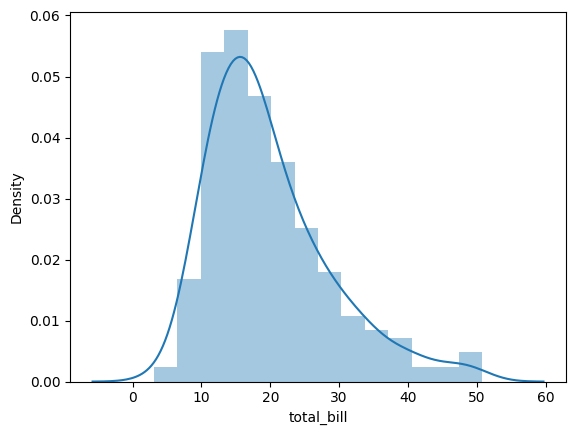

In [16]:
# before scaling
sns.distplot(df['total_bill']) # plot with original data 

<Axes: ylabel='Density'>

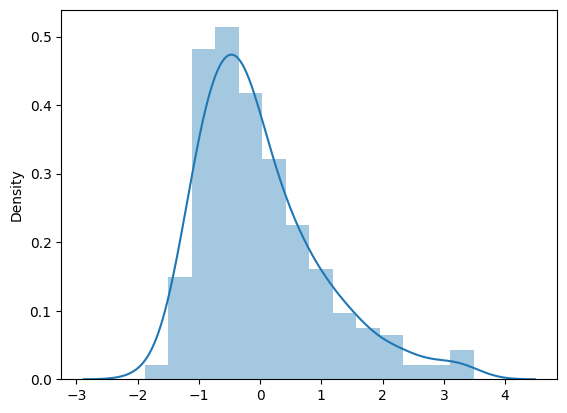

In [17]:
# after scaling
sns.distplot(std_data)

In [ ]:
# while building the ML model we will do train and test and then go for scaling as doing scaling on complete data will lead to data leakage and create 
# over fitting 
# test data should not be touched while building the model so if scaling is done on complete data 
# the model will follow the test data very closely and create over fitting

# always do scaling for numerical data (exception ordinal encoding )
# Never do scaling for target variables as we will be predicting the target variable 

In [18]:
# using sklearn for feature scaling using standardization
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaler

StandardScaler()

In [21]:
scaler.fit(df[['total_bill']]) # this step will calculate mu and sigma

StandardScaler()

In [ ]:
scaler.transform(df[['total_bill']])

In [23]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
scaler.fit_transform(df[['total_bill','tip']])

In [25]:
pd.DataFrame(scaler.fit_transform(df[['total_bill','tip']]), columns=[['total_bill','tip']])

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


In [26]:
# supplying new data and doing transform only
scaler.transform([[13, 1]])

array([[-0.76382571, -1.44718913]])

In [ ]:
## other type of feature scaling >> min max

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
min_max = MinMaxScaler()

In [29]:
min_max

MinMaxScaler()

In [ ]:
min_max.fit_transform(df[['total_bill','tip']])

In [31]:
# new data / test data
min_max.transform([[10,8]])

array([[0.14516129, 0.77777778]])

In [32]:
# unit vector
from sklearn.preprocessing import normalize


In [ ]:
normalize(df[['total_bill','tip']])

<img src ="scaling-methods.webp" width=950/>

In [37]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# Sample data
data = pd.DataFrame({'A': [1, 2, 3, 4, 5, 100]})

# Instantiate RobustScaler
scaler = RobustScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

print(scaled_data)


[[-1. ]
 [-0.6]
 [-0.2]
 [ 0.2]
 [ 0.6]
 [38.6]]


In [ ]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df[['total_bill','tip']])
print(scaled_data)